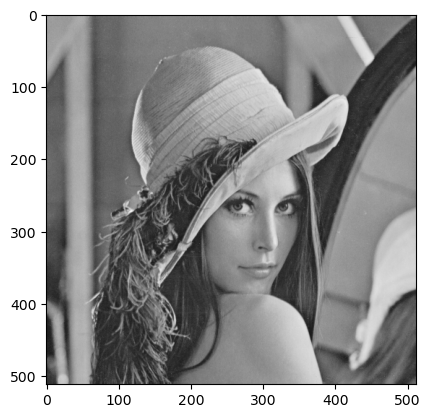

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image as img

image = cv2.imread('lena.bmp')
plt.imshow(image)
plt.show()

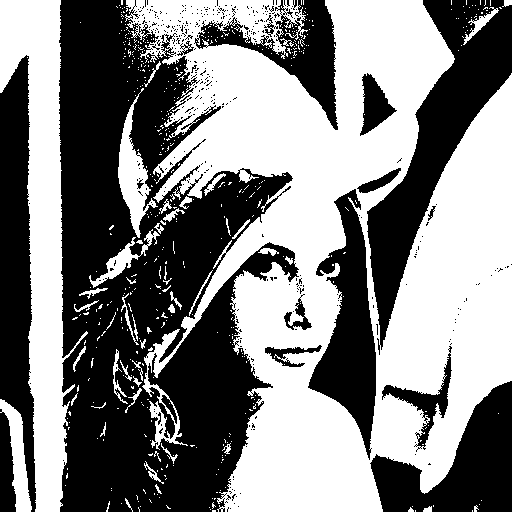

In [2]:
image = cv2.imread('lena.bmp', cv2.IMREAD_GRAYSCALE)
binarized_image = np.asarray(image)//128
img.fromarray(np.array(binarized_image,dtype='uint8')*255)

In [3]:
downsampled_image = np.zeros((64, 64), dtype=np.uint8)


for i in range(0, 512, 8):
    for j in range(0, 512, 8):
        downsampled_image[i//8, j//8] = binarized_image[i,j]

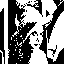

In [4]:
img.fromarray(np.array(downsampled_image*255,dtype='uint8'))

In [5]:
top_bottom_zeros = np.zeros((downsampled_image.shape[0] + 2, downsampled_image.shape[1] + 2), dtype=downsampled_image.dtype)
top_bottom_zeros[1:-1, 1:-1] = downsampled_image

In [6]:
def h(b, c, d, e):
    if(b == c and (d != b or e != b)):
        return 'q'
    elif(b == c and (d == b and e == b)):
        return 'r'
    elif(b!=c):
        return 's'

In [7]:
def f(a1,a2,a3,a4):
    if a1=='r' and a2=='r'and a3=='r'and a4=='r':
        return 5
    tmp=0
    if a1=='q':
        tmp+=1
    if a2=='q':
        tmp+=1
    if a3=='q':
        tmp+=1
    if a4=='q':
        tmp+=1
    return tmp

In [8]:
def yokoi(top_bottom_zeros):
    yokoi_image = np.zeros((66, 66), dtype=int)
    for i in range(1, 65):
        for j in range(1, 65):
            if top_bottom_zeros[i, j] == 1:
                a1 = h(top_bottom_zeros[i, j], top_bottom_zeros[i, j+1], top_bottom_zeros[i-1, j+1], top_bottom_zeros[i-1, j])
                a2 = h(top_bottom_zeros[i, j], top_bottom_zeros[i-1, j], top_bottom_zeros[i-1, j-1], top_bottom_zeros[i, j-1])
                a3 = h(top_bottom_zeros[i, j], top_bottom_zeros[i, j-1], top_bottom_zeros[i+1, j-1], top_bottom_zeros[i+1, j])
                a4 = h(top_bottom_zeros[i, j], top_bottom_zeros[i+1, j], top_bottom_zeros[i+1, j+1], top_bottom_zeros[i, j+1])
                
                yokoi_image[i, j] = f(a1, a2, a3, a4)
    return yokoi_image

In [9]:
def Pair_Relationship(yokoi_image):
    Relationship = [['q' for _ in range(66)] for _ in range(66)]
    res=[[0]*(66) for i in range(66)]
    for i in range(1, 65):
        for j in range(1, 65):
            if yokoi_image[i][j] == 1:
                if (yokoi_image[i+1][j] == 1) or (yokoi_image[i-1][j] == 1) or (yokoi_image[i][j+1] == 1) or (yokoi_image[i][j-1] == 1):
                     Relationship[i][j] = 'p'
#                 else:
#                     Relationship[i][j] = 'q'
#             else:
#                     Relationship[i][j] = 'q'
    return Relationship


In [10]:
def h2(b,c,d,e):
    if b==c and (b!=d or b!=e):
        return 1
    else:
        return 0
def f2(a1,a2,a3,a4,x):
    if a1+a2+a3+a4==1:
        return 0
    else:
        return x

In [11]:
def Shrink(top_bottom_zeros,Relationship):
    new_image = top_bottom_zeros.copy()
    for i in range(1, 65):
        for j in range(1, 65):
            if  Relationship[i][j] == 'p':
                a1 = h2(top_bottom_zeros[i,j], top_bottom_zeros[i,j+1], top_bottom_zeros[i-1,j+1], top_bottom_zeros[i-1,j])
                a2 = h2(top_bottom_zeros[i,j], top_bottom_zeros[i-1,j], top_bottom_zeros[i-1,j-1], top_bottom_zeros[i,j-1])
                a3 = h2(top_bottom_zeros[i,j], top_bottom_zeros[i,j-1], top_bottom_zeros[i+1,j-1], top_bottom_zeros[i+1,j])
                a4 = h2(top_bottom_zeros[i,j], top_bottom_zeros[i+1,j], top_bottom_zeros[i+1,j+1], top_bottom_zeros[i,j+1])

                new_image[i,j] = f2(a1,a2,a3,a4,top_bottom_zeros[i,j])
    return new_image

In [12]:
yokoi_image = np.zeros((66, 66), dtype=int)
Relationship = [['' for _ in range(66)] for _ in range(66)]
new_image = np.zeros((66, 66), dtype=int)

yokoi_image = yokoi(top_bottom_zeros)
Relationship = Pair_Relationship(yokoi_image)
new_image = Shrink(top_bottom_zeros,Relationship)

save_image = (new_image * 255).astype(np.uint8)  # 將二值圖轉為 0 和 255
filename = f"iteration_1.bmp"  # 命名圖片文件
cv2.imwrite(filename, save_image)  # 保存圖片
print(f"Saved: {filename}")

Saved: iteration_1.bmp


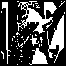

In [13]:
img.fromarray(np.array(new_image*255,dtype='uint8'))

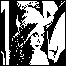

In [14]:
img.fromarray(np.array(top_bottom_zeros*255,dtype='uint8'))

In [15]:
iteration = 2
while not np.array_equal(new_image, top_bottom_zeros):
    top_bottom_zeros = new_image.copy()
    yokoi_image = yokoi(top_bottom_zeros)
    Relationship = Pair_Relationship(yokoi_image)
    new_image = Shrink(top_bottom_zeros,Relationship)
    print('1')
    save_image = (new_image * 255).astype(np.uint8)  # 將二值圖轉為 0 和 255
    filename = f"iteration_{iteration}.bmp"  # 命名圖片文件
    cv2.imwrite(filename, save_image)  # 保存圖片
    print(f"Saved: {filename}")
    
    iteration += 1 

1
Saved: iteration_2.bmp
1
Saved: iteration_3.bmp
1
Saved: iteration_4.bmp
1
Saved: iteration_5.bmp
1
Saved: iteration_6.bmp
1
Saved: iteration_7.bmp


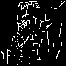

In [16]:
img.fromarray(np.array(new_image*255,dtype='uint8'))
# print(Relationship)

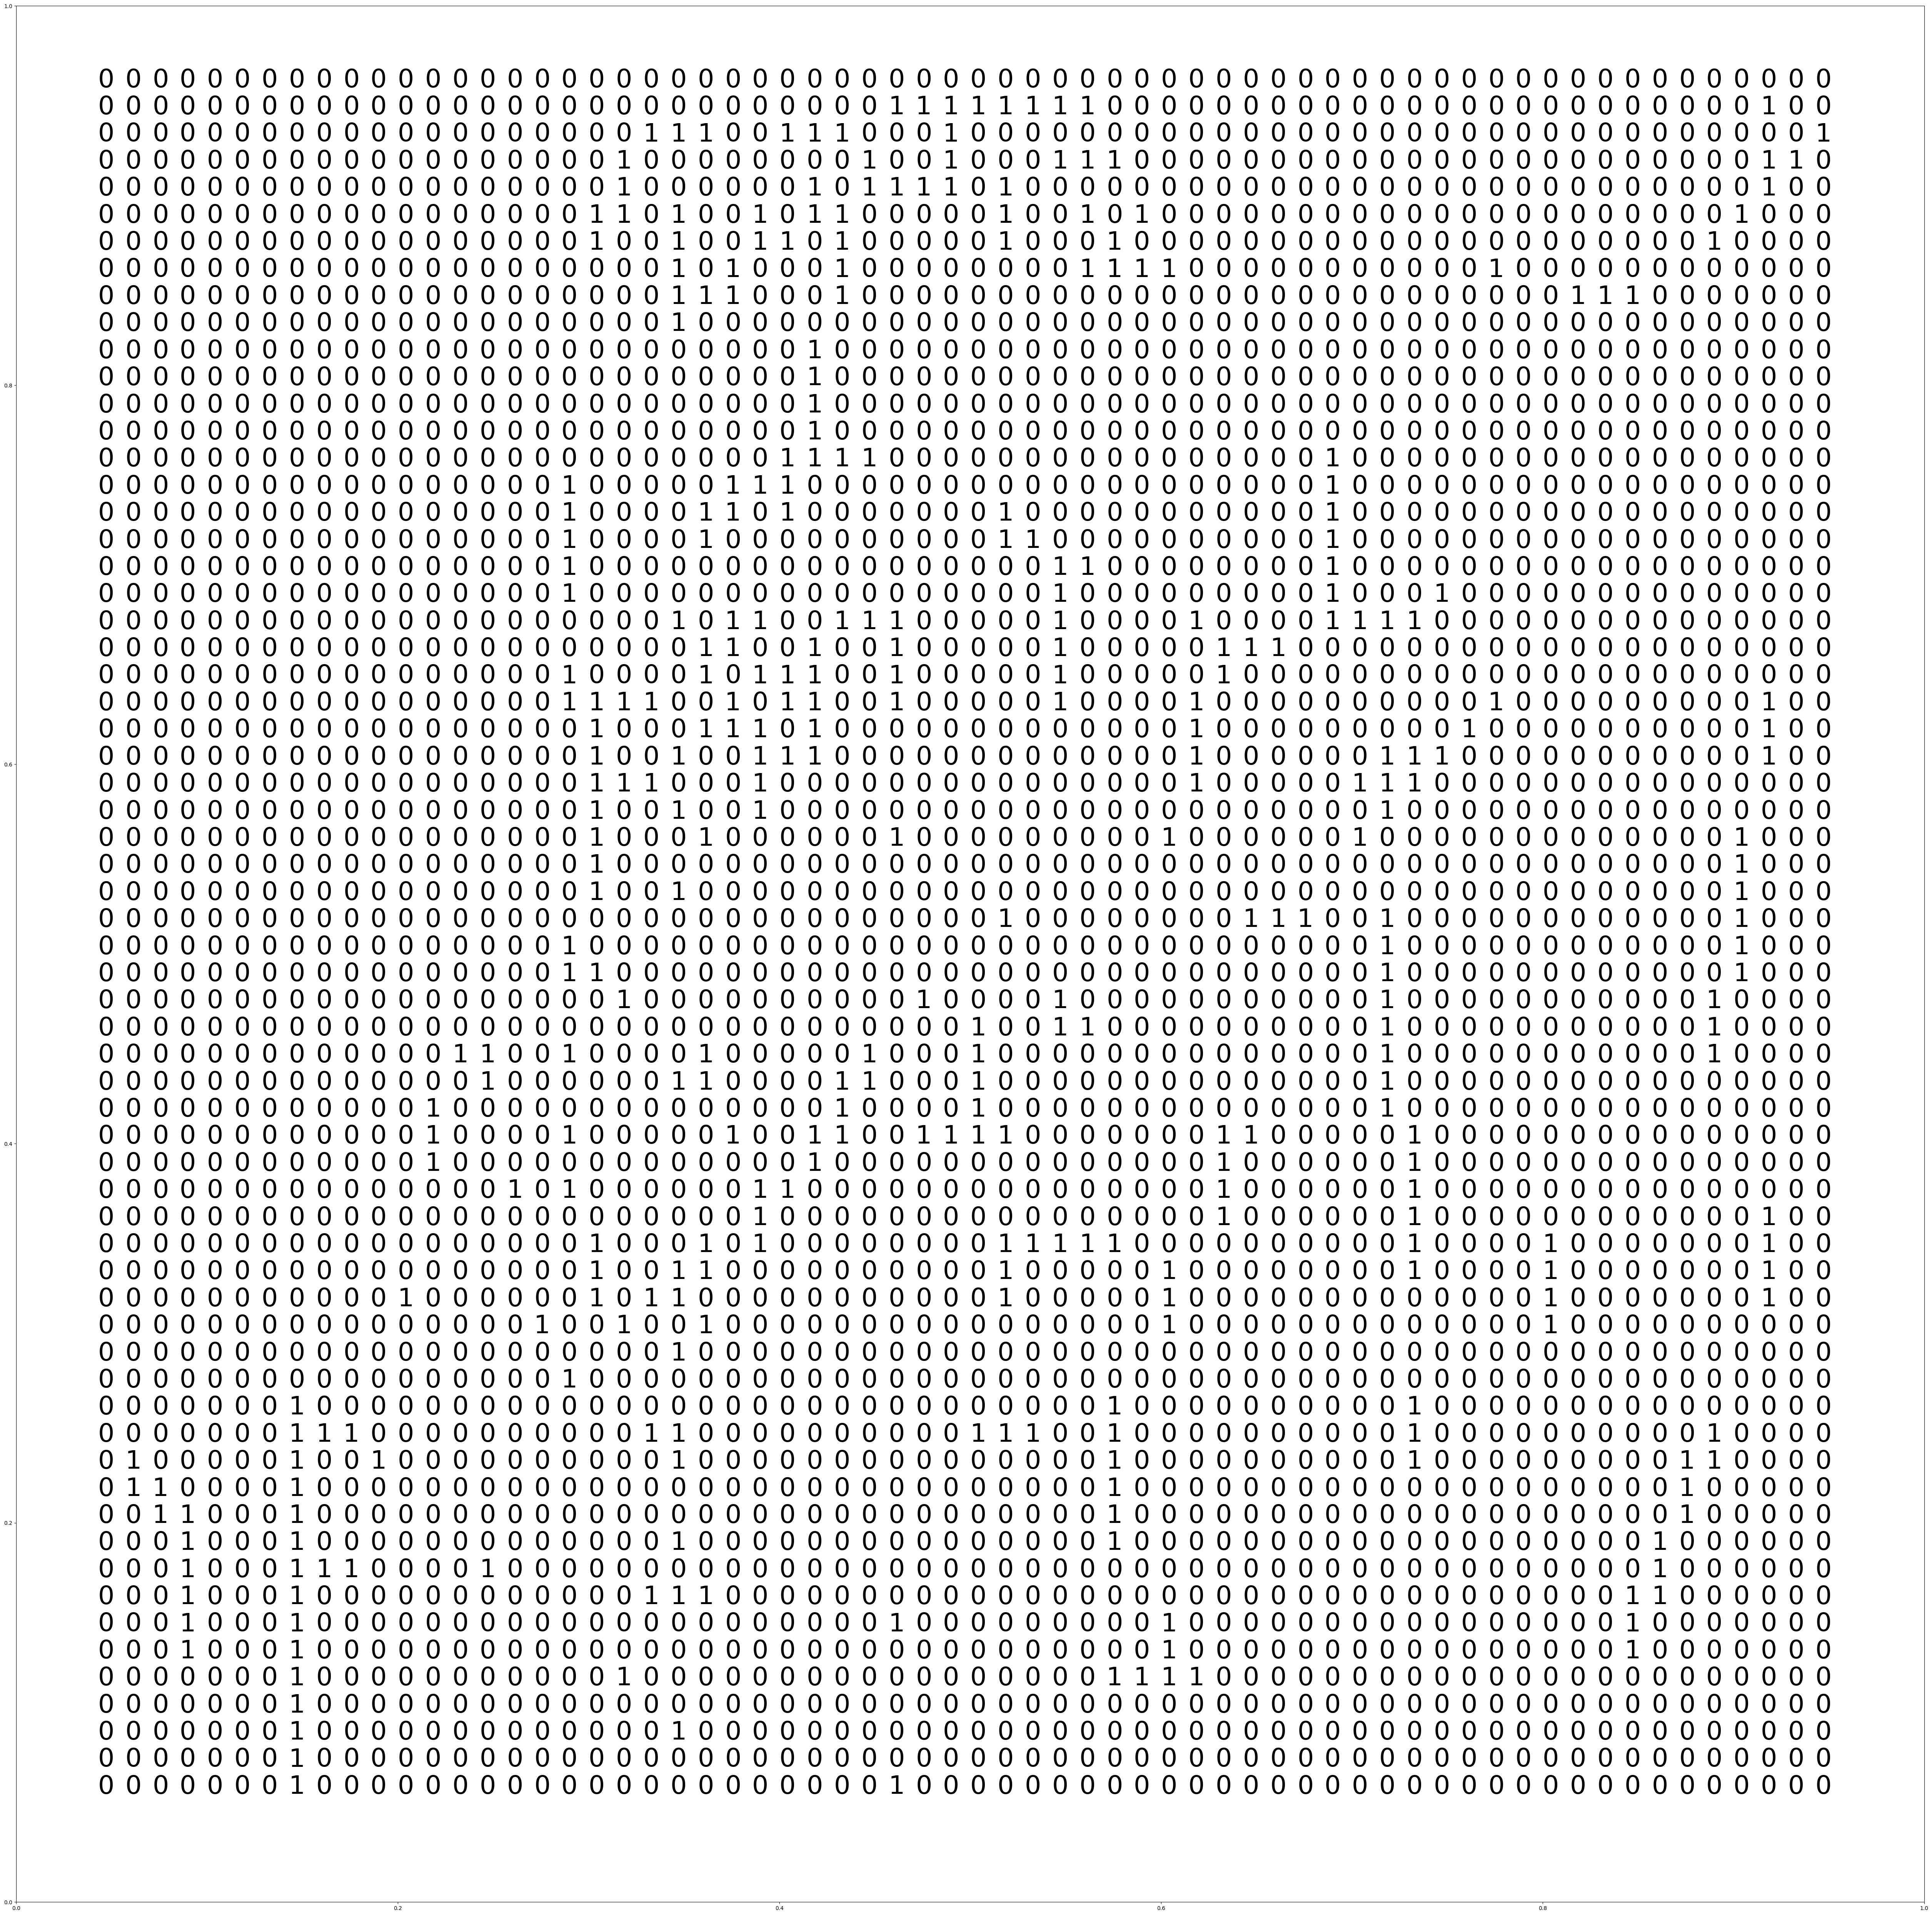

In [17]:
plt.figure(figsize=(64,64))
for i in range(64):
    for j in range(64):
        if Relationship[i][j]:
            plt.text((j+3)/70,(67-i)/70,str(new_image[i][j]),fontsize=48)
plt.show()